# HW3 - Basic Data Processing for Data Visualization

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2022
#### Due : 6/01 (Wed)  23:59 PM 

------------------------------------------
## __ Ready for Assingment __
-  install [anaconda](https://www.anaconda.com/) or [miniconda](https://docs.conda.io/en/latest/miniconda.html)

-  create new environment and install [python](https://www.python.org/) with version 3.6.x

- install libraries in the environment and use the environment for this assignment
   - [NumPy](http://docs.scipy.org/doc/numpy-dev/user/index.html), fot arrays
   - [pandas](http://pandas.pydata.org/), for data frames
   - [matplotlib](http://matplotlib.org/), for plotting
   - [folium](https://python-visualization.github.io/folium/quickstart.html#Getting-Started) and [plotly](https://plotly.com/python/plotly-express/#plotly-express) for plotting, visualizing
         
------------------------------------------

## Python Assingment HW3 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- The necessary libraries are already imported below.
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

In [498]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import plotly.express as px
import cufflinks as cf
cf.go_offline(connected=True)

## Problem1. Data Processing

### Problem 1-1 Load data file and check the data

1. Load dataframe (Python data structure) using <b>pandas library<b>
    - 'confirmed.csv': covid19 confirmed cases data
    - 'fatalities.csv': covid19 fatal cases data
    - 'metadata.csv': detail data for each country
    - 'policy.csv': policy data for each country

In [499]:
###YOUR CODE HERE###
df_confirmed = pd.read_csv('/Users/hyungwook/Desktop/학교강의/2022-1/데과/HW3_dataset/confirmed.csv').sort_values(by='Country_Region')
df_fatalities = pd.read_csv('/Users/hyungwook/Desktop/학교강의/2022-1/데과/HW3_dataset/fatalities.csv').sort_values(by='Country_Region')
df_metadata = pd.read_csv('/Users/hyungwook/Desktop/학교강의/2022-1/데과/HW3_dataset/metadata.csv').sort_values(by='Country_Region')
df_policy = pd.read_csv('/Users/hyungwook/Desktop/학교강의/2022-1/데과/HW3_dataset/policy.csv')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning:

Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.



2. Check the data using 'shape' and 'head' and 'tail'

In [500]:
# You can check whether data is correctly loaded in your df
df_confirmed.shape
df_confirmed.head()
df_confirmed.tail()

df_fatalities.shape
df_fatalities.head()
df_fatalities.tail()

df_metadata.shape
df_metadata.head()
df_metadata.tail()

df_policy.shape
df_policy.head()
df_policy.tail()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
293767,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20220513,NaN,NaN,NaN,NaN,...,NaN,61.11,NaN,65.0,NaN,51.56,NaN,58.93,NaN,0.0
293768,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20220514,NaN,NaN,NaN,NaN,...,NaN,61.11,NaN,65.0,NaN,51.56,NaN,58.93,NaN,0.0
293769,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20220515,NaN,NaN,NaN,NaN,...,NaN,61.11,NaN,65.0,NaN,51.56,NaN,58.93,NaN,0.0
293770,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20220516,NaN,NaN,NaN,NaN,...,NaN,61.11,NaN,65.0,NaN,51.56,NaN,58.93,NaN,0.0
293771,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20220517,NaN,NaN,NaN,NaN,...,NaN,61.11,NaN,65.0,NaN,51.56,NaN,58.93,NaN,0.0


2. Check the number of blank in 'Province_State' column in the confirmed dataset and the fatalities dataset

In [501]:
###YOUR CODE HERE###
count_confiremd = df_confirmed["Province_State"].isna().sum()
display(count_confiremd)

count_fatalities = df_fatalities["Province_State"].isna().sum()
display(count_fatalities)

196

196

3. Drop all columns except 'CountryName', 'Date', 'ConfirmedCases', 'ConfirmedDeaths' in the policy dataset and drop the rows containing blank in 'ConfirmedCases' or 'ConfirmedDeaths' columns

In [502]:
###YOUR CODE HERE###
df_policy.drop(df_policy.columns.difference(['CountryName', 'Date', 'ConfirmedCases', 'ConfirmedDeaths']), 1, inplace=True)
df_policy = df_policy.dropna(subset=['ConfirmedCases', 'ConfirmedDeaths'])
display(df_policy)

/var/folders/b0/s5skfp5n4vg069_qbbqwz_cc0000gn/T/ipykernel_1031/2393977985.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,CountryName,Date,ConfirmedCases,ConfirmedDeaths
21,Aruba,20200122,0.0,0.0
22,Aruba,20200123,0.0,0.0
23,Aruba,20200124,0.0,0.0
24,Aruba,20200125,0.0,0.0
25,Aruba,20200126,0.0,0.0
...,...,...,...,...
293757,Zimbabwe,20220503,247990.0,5470.0
293758,Zimbabwe,20220504,248050.0,5471.0
293759,Zimbabwe,20220505,248050.0,5471.0
293760,Zimbabwe,20220506,248214.0,5473.0


### Problem 1-2 Data Cleaning

1. Fill blank to '' in 'Province_State' column of 'confirmed', 'fatalities', 'metadata' dataset using fillna

In [503]:
###YOUR CODE HERE###
df_confirmed['Province_State'] = df_confirmed['Province_State'].fillna('')

df_fatalities['Province_State'] = df_fatalities['Province_State'].fillna('')

df_metadata['Province_State'] = df_metadata['Province_State'].fillna('')
# display(df_metadata)

2. Merge 'Country_Region' and 'Province_State' columns in the confirmed dataset and fatalities dataset, then drop some columns and print the two dataset like the result below 

In [504]:
###YOUR CODE HERE###
df_confirmed['Country_Region'] = df_confirmed['Country_Region'] + ':' + df_confirmed['Province_State']
df_confirmed = df_confirmed.drop(['Province_State', 'Lat', 'Long'], axis=1)
display(df_confirmed)

,Country_Region,200122,200123,200124,200125,200126,200127,200128,200129,200130,...,220507,220508,220509,220510,220511,220512,220513,220514,220515,220516
0,Afghanistan:,0,0,0,0,0,0,0,0,0,...,178922,178981,179010,179017,179131,179169,179203,179242,179267,179321
1,Albania:,0,0,0,0,0,0,0,0,0,...,275341,275366,275372,275416,275440,275485,275534,275574,275615,275621
2,Algeria:,0,0,0,0,0,0,0,0,0,...,265794,265798,265800,265804,265806,265808,265814,265816,265818,265823
3,Andorra:,0,0,0,0,0,0,0,0,0,...,41717,41717,41717,41717,41717,42156,42156,42156,42156,42156
4,Angola:,0,0,0,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,West Bank and Gaza:,0,0,0,0,0,0,0,0,0,...,657060,657060,657193,657193,657193,657193,657193,657193,657193,657329
281,Winter Olympics 2022:,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,Yemen:,0,0,0,0,0,0,0,0,0,...,11819,11819,11819,11819,11819,11819,11819,11819,11819,11819
283,Zambia:,0,0,0,0,0,0,0,0,0,...,320099,320099,320157,320226,320303,320412,320481,320591,320627,320680


In [505]:
###YOUR CODE HERE###
df_fatalities['Country_Region'] = df_fatalities['Country_Region'] + ':' + df_fatalities['Province_State']
df_fatalities = df_fatalities.drop(['Province_State', 'Lat', 'Long'], axis=1)
display(df_fatalities)

,Country_Region,200122,200123,200124,200125,200126,200127,200128,200129,200130,...,220507,220508,220509,220510,220511,220512,220513,220514,220515,220516
0,Afghanistan:,0,0,0,0,0,0,0,0,0,...,7684,7684,7685,7685,7686,7686,7686,7687,7690,7691
1,Albania:,0,0,0,0,0,0,0,0,0,...,3496,3497,3497,3497,3497,3497,3497,3497,3497,3497
2,Algeria:,0,0,0,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6875,6875,6875
3,Andorra:,0,0,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,Angola:,0,0,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,West Bank and Gaza:,0,0,0,0,0,0,0,0,0,...,5657,5657,5657,5657,5657,5657,5657,5657,5657,5657
281,Winter Olympics 2022:,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,Yemen:,0,0,0,0,0,0,0,0,0,...,2149,2149,2149,2149,2149,2149,2149,2149,2149,2149
283,Zambia:,0,0,0,0,0,0,0,0,0,...,3982,3982,3982,3983,3983,3983,3983,3983,3983,3983


3. Count covid19 confirmed cases and fatalities cases for each date by each 'Country_Region' using concat

In [506]:
###YOUR CODE HERE###
df_confirmed = df_confirmed.melt(id_vars=['Country_Region'], var_name='Date', value_name='ConfirmedCases').sort_values(by=['Country_Region', 'Date'])
display(df_confirmed)

,Country_Region,Date,ConfirmedCases
0,Afghanistan:,200122,0
285,Afghanistan:,200123,0
570,Afghanistan:,200124,0
855,Afghanistan:,200125,0
1140,Afghanistan:,200126,0
...,...,...,...
239969,Zimbabwe:,220512,248943
240254,Zimbabwe:,220513,249131
240539,Zimbabwe:,220514,249206
240824,Zimbabwe:,220515,249206


In [507]:
###YOUR CODE HERE###
df_fatalities = df_fatalities.melt(id_vars=['Country_Region'], var_name='Date', value_name='Fatalities').sort_values(by=['Country_Region', 'Date'])
display(df_fatalities)

,Country_Region,Date,Fatalities
0,Afghanistan:,200122,0
285,Afghanistan:,200123,0
570,Afghanistan:,200124,0
855,Afghanistan:,200125,0
1140,Afghanistan:,200126,0
...,...,...,...
239969,Zimbabwe:,220512,5481
240254,Zimbabwe:,220513,5482
240539,Zimbabwe:,220514,5482
240824,Zimbabwe:,220515,5482


4. Merge the two dataset in 3. to variable <b>'covid'</b> and split the 'Country_Region' column into 'Country_Region' and 'Province_State' again like the result below

In [508]:
###YOUR CODE HERE###
covid = df_confirmed.merge(df_fatalities, on=['Country_Region', 'Date'])
covid['Country_Region'] = covid.Country_Region.str.split(':').str[0]
covid['Province_State'] = covid.Country_Region.str.split(':').str[1]
covid['Province_State'] = covid['Province_State'].fillna('')
covid = covid[['Country_Region', 'Province_State', 'Date', 'ConfirmedCases', 'Fatalities']]

display(covid)

,Country_Region,Province_State,Date,ConfirmedCases,Fatalities
0,Afghanistan,,200122,0,0
1,Afghanistan,,200123,0,0
2,Afghanistan,,200124,0,0
3,Afghanistan,,200125,0,0
4,Afghanistan,,200126,0,0
...,...,...,...,...,...
241105,Zimbabwe,,220512,248943,5481
241106,Zimbabwe,,220513,249131,5482
241107,Zimbabwe,,220514,249206,5482
241108,Zimbabwe,,220515,249206,5482


### Problem 1-3 Data  Filtering
1. Filter rows with the most recent day of in the column 'Date' in <b>covid dataset</b>
- <b>Hint, Please refer to the following link below <b>
    - __https://pythonspot.com/pandas-filter/__

In [509]:
###YOUR CODE HERE###
covid = covid[(covid.Date == '220516')]
display(covid)

,Country_Region,Province_State,Date,ConfirmedCases,Fatalities
845,Afghanistan,,220516,179321,7691
1691,Albania,,220516,275621,3497
2537,Algeria,,220516,265823,6875
3383,Andorra,,220516,42156,153
4229,Angola,,220516,99287,1900
...,...,...,...,...,...
237725,West Bank and Gaza,,220516,657329,5657
238571,Winter Olympics 2022,,220516,535,0
239417,Yemen,,220516,11819,2149
240263,Zambia,,220516,320680,3983


### Problem 1-4 Data  Grouping
1. Calculate sum of 'ConfirmedCases' and 'Fatalities'  by grouping Countrty_Region
- <b>Hint, Please refer to the following link below<b>
    - __https://pythonspot.com/pandas-groupby/__


In [510]:
###YOUR CODE HERE###
covid = covid.groupby('Country_Region')[['ConfirmedCases', 'Fatalities']].sum()
display(covid)


,ConfirmedCases,Fatalities
Country_Region,,
Afghanistan,179321,7691
Albania,275621,3497
Algeria,265823,6875
Andorra,42156,153
Angola,99287,1900
...,...,...
West Bank and Gaza,657329,5657
Winter Olympics 2022,535,0
Yemen,11819,2149


### Problem 1-5 Data Merging
1. Join the table from covid dataset with the metadata table
- __Condition 1 : Check the difference of 'Country_Region' between both datasets__
- __Condition 2 : in the meta dataset due to Province_State, there are many same Country_Region. We use only dataset which not contain province_State data__

In [511]:
###YOUR CODE HERE###
df_metadata = df_metadata[df_metadata["Province_State"].str.len() == 0]
df_metadata = df_metadata.drop('Province_State', axis=1)

In [512]:
###YOUR CODE HERE###
merged = pd.merge(left=covid, right=df_metadata, how='left', on='Country_Region')
display(merged)

,Country_Region,ConfirmedCases,Fatalities,lat,lon,continent,population,area,density
0,Afghanistan,179321,7691,33.0000,65.0000,Asia,38041754.0,652230.0,58.33
1,Albania,275621,3497,41.1533,20.1683,Europe,2880917.0,28748.0,100.21
2,Algeria,265823,6875,28.0339,1.6596,Africa,43053054.0,2381741.0,18.08
3,Andorra,42156,153,42.5063,1.5218,Europe,77142.0,468.0,164.83
4,Angola,99287,1900,-11.2027,17.8739,Africa,31825295.0,1246700.0,25.53
...,...,...,...,...,...,...,...,...,...
194,West Bank and Gaza,657329,5657,31.6000,34.8000,Asia,5190143.0,6020.0,862.15
195,Winter Olympics 2022,535,0,NaN,NaN,NaN,NaN,NaN,NaN
196,Yemen,11819,2149,15.5527,48.5164,Asia,28498683.0,527968.0,53.98
197,Zambia,320680,3983,-15.4167,28.2833,Africa,17861030.0,752612.0,23.73


# Problem2 Data Visualizing

## Problem 2-1  plot barchart of  top10 'ConfirmedCases' and 'Fatalities' in joined covid dataset

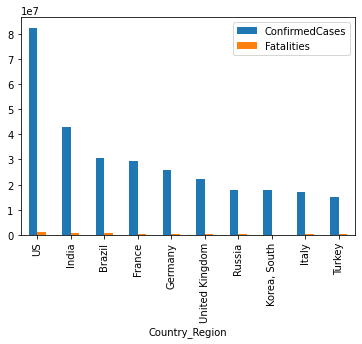

In [513]:
###YOUR CODE HERE###
tmp = merged.sort_values(by='ConfirmedCases', ascending=False).head(10)[['ConfirmedCases', 'Fatalities', 'Country_Region']].set_index(keys=['Country_Region'], inplace=False, drop=True)
tmp.plot(kind='bar')
plt.show()

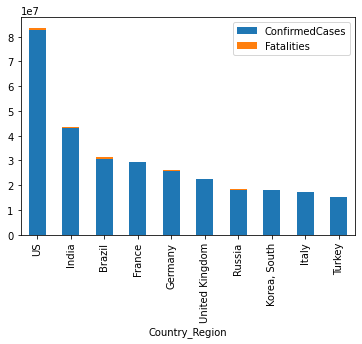

In [514]:
###YOUR CODE HERE###
tmp.plot(kind='bar', stacked=True)
plt.show()

## Problem2-2  visualizing your data to express 'corona infection situation global map'
 <b> Hint. Refer to the website written at the beginning of the document.<b>

In [515]:
###YOUR CODE HERE###
m = folium.Map(tiles="Stamen Terrain",min_zoom=1.5)
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_geo=f'{url}/world-countries.json'

folium.Choropleth(
    geo_data=country_geo,
    min_zoom =2,
    name = 'Covid-19',
    data = merged,
    columns= ['Country_Region','ConfirmedCases', 'Fatalities'],
    key_on = 'feature.properties.name',
    fill_color = 'OrRd',
    nan_fill_color = 'black',
    legend_name ='Total Confirmed COVID Cases',
).add_to(m)

m

## Problem2-3  visualizing your data to express 'corona infection situation ' according to date

1. Visualize 'ConfirmedCases' trend plot of 'Australia', 'Japan', 'New Zealand', 'Singapore', 'South Korea' from the beginning and the end of policy dataset using iplot

 <b> Hint. Refer to the website written at the beginning of the document.<b>

In [516]:
import cufflinks as cf
cf.go_offline(connected=True)

In [517]:
### Visualize each subplot for each country
df_australia = df_policy[df_policy["CountryName"].str.contains('Australia') == True].groupby('Date')['ConfirmedCases'].sum()
df_australia.iplot(xTitle='Date')

df_japan = df_policy[df_policy["CountryName"].str.contains('Japan') == True].groupby('Date')['ConfirmedCases'].sum()
df_japan.iplot(xTitle='Date')

df_newzealand = df_policy[df_policy["CountryName"].str.contains('New Zealand') == True].groupby('Date')['ConfirmedCases'].sum()
df_newzealand.iplot(xTitle='Date')

df_singapore = df_policy[df_policy["CountryName"].str.contains('Singapore') == True].groupby('Date')['ConfirmedCases'].sum()
df_singapore.iplot(xTitle='Date')

df_korea = df_policy[df_policy["CountryName"].str.contains('South Korea') == True].groupby('Date')['ConfirmedCases'].sum()
df_korea.iplot(xTitle='Date')


In [518]:
### Visualize combined plot of five countries
df_sum = df_australia.add(df_japan)
df_sum = df_sum.add(df_newzealand)
df_sum = df_sum.add(df_singapore)
df_sum = df_sum.add(df_korea)

df_sum.iplot(xTitle='Date')

## Problem2-4  visualizing your data to express 'corona infection situation ' according to other factor.

1. Scatter the population-ConfirmedCases log plot for each continents using plotly with the size of 'density' in the metadata

<b> Hint. Refer to the website written at the beginning of the document.<b>

In [519]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [524]:
###YOUR CODE HERE###
df_Africa = merged[merged['continent'].str.contains('Africa') == True]
fig = px.scatter(df_Africa, x='population', y='ConfirmedCases', hover_name='density', log_x=True, log_y=True)
fig.show()

df_Americas = merged[merged['continent'].str.contains('Americas') == True]
fig = px.scatter(df_Americas, x='population', y='ConfirmedCases', hover_name='density', log_x=True, log_y=True)
fig.show()

df_Asia = merged[merged['continent'].str.contains('Asia') == True]
fig = px.scatter(df_Asia, x='population', y='ConfirmedCases', hover_name='density', log_x=True, log_y=True)
fig.show()

df_Europe = merged[merged['continent'].str.contains('Europe') == True]
fig = px.scatter(df_Europe, x='population', y='ConfirmedCases', hover_name='density', log_x=True, log_y=True)
fig.show()

df_Oceania = merged[merged['continent'].str.contains('Oceania') == True]
fig = px.scatter(df_Oceania, x='population', y='ConfirmedCases', hover_name='density', log_x=True, log_y=True)
fig.show()
